<a href="https://colab.research.google.com/github/lcandelaf/fumarbeber/blob/main/Efectos_del_alcohol_y_tabaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Las drogas como placebo.`**

Con mayor frecuencia escuchamos cada día sobre accidentes de tráfico que suceden por niveles elevados de alcohol en sangre, también, en reuniones familiares, de amigos, o en cada salida de fin de semana vemos como distintas personas toman hasta perder la conciencia.


Vemos como cada día es más dificil llevar una dieta balanceada, producto del sobretrabajo, de las actividades diarias, o de lo costoso que conlleva consumir alimentos nutricionales de buena calidad

Y no olvidemos, en la era de la rapidez, lo dificil que es calmar la mente. Y consecuente a esto buscamos placebos diarios que podamos aplicar a nuestros cerebros en forma de *click* para dejar de oir el run-run de la cabeza

### *Uso, abuso y dependencia*

Quiza el consumo esporádico de alcohol, tabaco, o comer alimentos que no sean de la mejor calidad, no son perjudiciales en el largo plazo.
¿Pero que sucede cuando el uso se vuelve abuso? ¿Y si dependemos de ellas para poder llevar el día a día?

¿En que momento el uso diario se convierte en abuso? ¿Y cuando en dependencia?

El presente dataset busca analizar, demostrar y relacionar distintas variables físicas para que se puedan tener en cuenta en la hora de la evaluación y diagnostico de una persona.


También, buscamos demostrar el estado actual de salud de la sociedad.

# Librerias - modulos

In [1]:
#Manipulación de datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Preprocesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#Modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA


# Dataset

Fuente:" https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset"

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lcandelaf/fumarbeber/main/fumar-beber.TXT')
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,142.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24993,Female,55,155,55,70.0,0.5,0.5,1.0,1.0,132.0,...,138.0,145.0,14.0,1.0,1.0,13.0,14.0,30.0,1.0,N
24994,Male,25,175,70,73.0,1.5,1.5,1.0,1.0,140.0,...,99.0,277.0,14.9,1.0,0.7,22.0,10.0,15.0,2.0,Y
24995,Female,50,150,65,88.0,1.0,0.7,1.0,1.0,114.0,...,116.0,78.0,14.2,1.0,0.9,17.0,15.0,33.0,1.0,N
24996,Female,55,150,40,64.0,1.2,0.9,1.0,1.0,132.0,...,136.0,39.0,14.1,1.0,0.7,77.0,75.0,14.0,1.0,N


# Analisis exploratorio de datos

## Tamaño del dataset

In [3]:
df.shape

(24998, 24)

## Cantidad de nulos

In [4]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

## Descripción de la desviación de los datos

In [5]:
df.describe()


,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,...,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000
mean,47.580206,162.290583,63.317465,81.298284,0.980742,0.978266,1.029162,1.029402,122.522682,76.089047,...,57.229858,113.176934,133.261181,14.234171,1.099048,0.858841,25.768541,25.584927,36.988519,1.612969
std,14.155886,9.268331,12.486954,12.624993,0.609442,0.596430,0.168265,0.168935,14.608700,9.967687,...,53.226703,46.703420,119.310533,1.576712,0.449416,0.294054,14.726696,20.424637,48.276808,0.821328
min,20.000000,135.000000,30.000000,35.000000,0.100000,0.100000,1.000000,1.000000,75.000000,42.000000,...,4.000000,1.000000,1.000000,6.100000,1.000000,0.100000,4.000000,2.000000,2.000000,1.000000
25%,35.000000,155.000000,55.000000,74.400000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,107.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.500000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,40.000000,2.000000
max,85.000000,190.000000,130.000000,999.000000,9.900000,9.900000,2.000000,2.000000,230.000000,160.000000,...,8110.000000,5119.000000,9490.000000,20.300000,6.000000,16.400000,911.000000,659.000000,999.000000,3.000000


##Ajustes al dataset

In [6]:
data = df.copy()
data

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,142.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24993,Female,55,155,55,70.0,0.5,0.5,1.0,1.0,132.0,...,138.0,145.0,14.0,1.0,1.0,13.0,14.0,30.0,1.0,N
24994,Male,25,175,70,73.0,1.5,1.5,1.0,1.0,140.0,...,99.0,277.0,14.9,1.0,0.7,22.0,10.0,15.0,2.0,Y
24995,Female,50,150,65,88.0,1.0,0.7,1.0,1.0,114.0,...,116.0,78.0,14.2,1.0,0.9,17.0,15.0,33.0,1.0,N
24996,Female,55,150,40,64.0,1.2,0.9,1.0,1.0,132.0,...,136.0,39.0,14.1,1.0,0.7,77.0,75.0,14.0,1.0,N


Codificamos las columnas con *valores* *categoricos*


*   Sex
*   DRK_YN



In [7]:
le= LabelEncoder()
le_sex = le.fit_transform(data['sex'])
le_drk_yn = le.fit_transform(data['DRK_YN'])

Las reasignamos a las columnas ya existentes.

In [8]:
data['sex_2'] = le_sex
data['Alcoholic'] = le_drk_yn
data = data.drop(['DRK_YN'], axis=1)

Corroboramos que las columnas categoricas que han sido codificadas esten presentes en el dataset

In [9]:
data

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,sex_2,Alcoholic
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1,1
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,1,0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,1,0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,1,0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,142.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24993,Female,55,155,55,70.0,0.5,0.5,1.0,1.0,132.0,...,145.0,14.0,1.0,1.0,13.0,14.0,30.0,1.0,0,0
24994,Male,25,175,70,73.0,1.5,1.5,1.0,1.0,140.0,...,277.0,14.9,1.0,0.7,22.0,10.0,15.0,2.0,1,1
24995,Female,50,150,65,88.0,1.0,0.7,1.0,1.0,114.0,...,78.0,14.2,1.0,0.9,17.0,15.0,33.0,1.0,0,0
24996,Female,55,150,40,64.0,1.2,0.9,1.0,1.0,132.0,...,39.0,14.1,1.0,0.7,77.0,75.0,14.0,1.0,0,0


In [10]:
data_copy = data.copy()
data_copy.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,sex_2,Alcoholic
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1,1
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,1,0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,1,0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,1,0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,142.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,1,0


Renombramos la columna 'SMK_stat_type_cd' por 'Tipo_fumador'.

In [11]:
data_copy['Tipo_fumador'] = data_copy['SMK_stat_type_cd']
data_copy = data_copy.drop(['SMK_stat_type_cd'], axis=1)

## Presencia de Outliers

Función que determina si un dato es o no outlier dependiendo del valor que tome y si el mismo pasa o no el umbral

In [12]:
def outlier_euclideano_d(data,umbral):
  data_mean = data.mean() # media de los datos
  dist = np.sqrt(np.sum(((data-data_mean) ** 2),axis=1))
  #z-score para las distancias
  #media de las distancia
  dist_mean = dist.mean()
  dists_std = np.abs((dist - dist_mean) / dist.std())
  outliers=[]
  for x in dists_std:
    if x > umbral:
      outliers.append('Outlier')
    else:
      outliers.append('Inlier')
  return outliers

In [13]:
data_copy['outlier']=outlier_euclideano_d(data_copy,2)
data_copy.head()

<ipython-input-12-5648a7fbcc1a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_mean = data.mean() # media de los datos


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,sex_2,Alcoholic,Tipo_fumador,outlier
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1,1,1.0,Inlier
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,15.8,1.0,0.9,20.0,36.0,27.0,1,0,3.0,Inlier
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,15.8,1.0,0.9,47.0,32.0,68.0,1,0,1.0,Inlier
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,17.6,1.0,1.1,29.0,34.0,18.0,1,0,1.0,Inlier
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,142.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1,0,1.0,Inlier


Cantidad de inliers y outliers

In [14]:
data_copy.outlier.value_counts()

Inlier     24555
Outlier      443
Name: outlier, dtype: int64

<Axes: xlabel='hemoglobin', ylabel='triglyceride'>

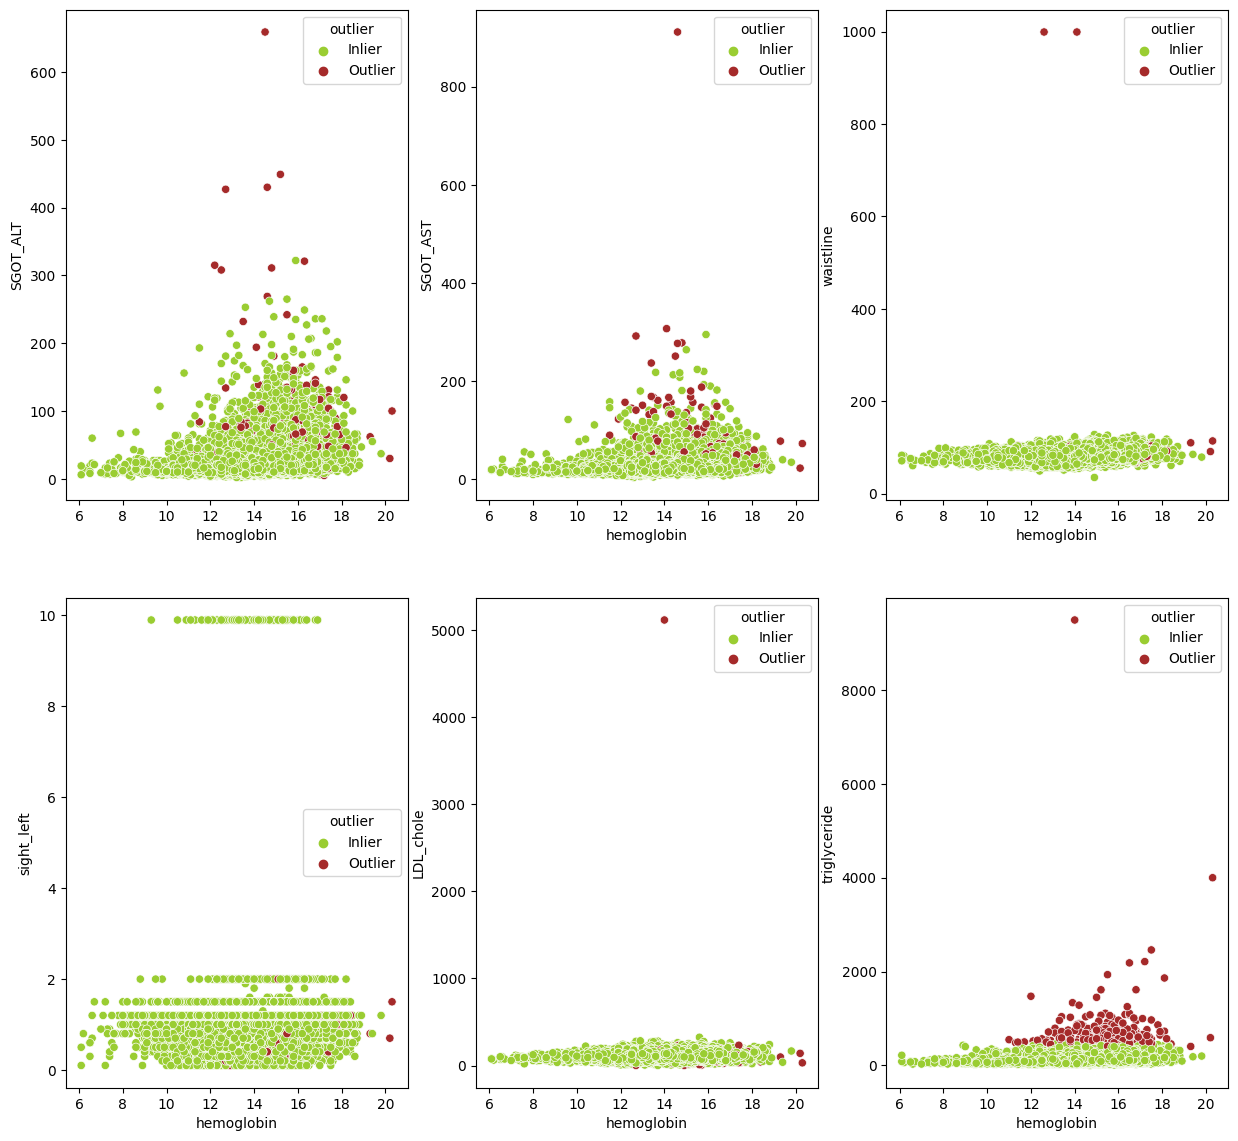

In [15]:
plt.figure(figsize=(15,14))
plt.subplot(2,3,1)
sns.scatterplot(x="hemoglobin",y="SGOT_ALT",data=data_copy,hue="outlier",palette=["yellowgreen","brown"])
plt.subplot(2,3,2)
sns.scatterplot(x="hemoglobin",y="SGOT_AST",data=data_copy,hue="outlier",palette=["yellowgreen","brown"])
plt.subplot(2,3,3)
sns.scatterplot(x="hemoglobin",y="waistline",data=data_copy,hue="outlier",palette=["yellowgreen","brown"])
plt.subplot(2,3,4)
sns.scatterplot(x="hemoglobin",y="sight_left",data=data_copy,hue="outlier",palette=["yellowgreen","brown"])
plt.subplot(2,3,5)
sns.scatterplot(x="hemoglobin",y="LDL_chole",data=data_copy,hue="outlier",palette=["yellowgreen","brown"])
plt.subplot(2,3,6)
sns.scatterplot(x="hemoglobin",y="triglyceride",data=data_copy,hue="outlier",palette=["yellowgreen","brown"])

In [16]:
def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 3

    fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 15))

    for i, column in enumerate(num_columns):
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        sns.color_palette("Set2")
        sns.boxplot(x=dataframe[column], ax=ax, color='slategray')
        ax.set_title(f"Boxplot de {column}")
        ax.set_xlabel(column)

    plt.tight_layout()
    plt.show()

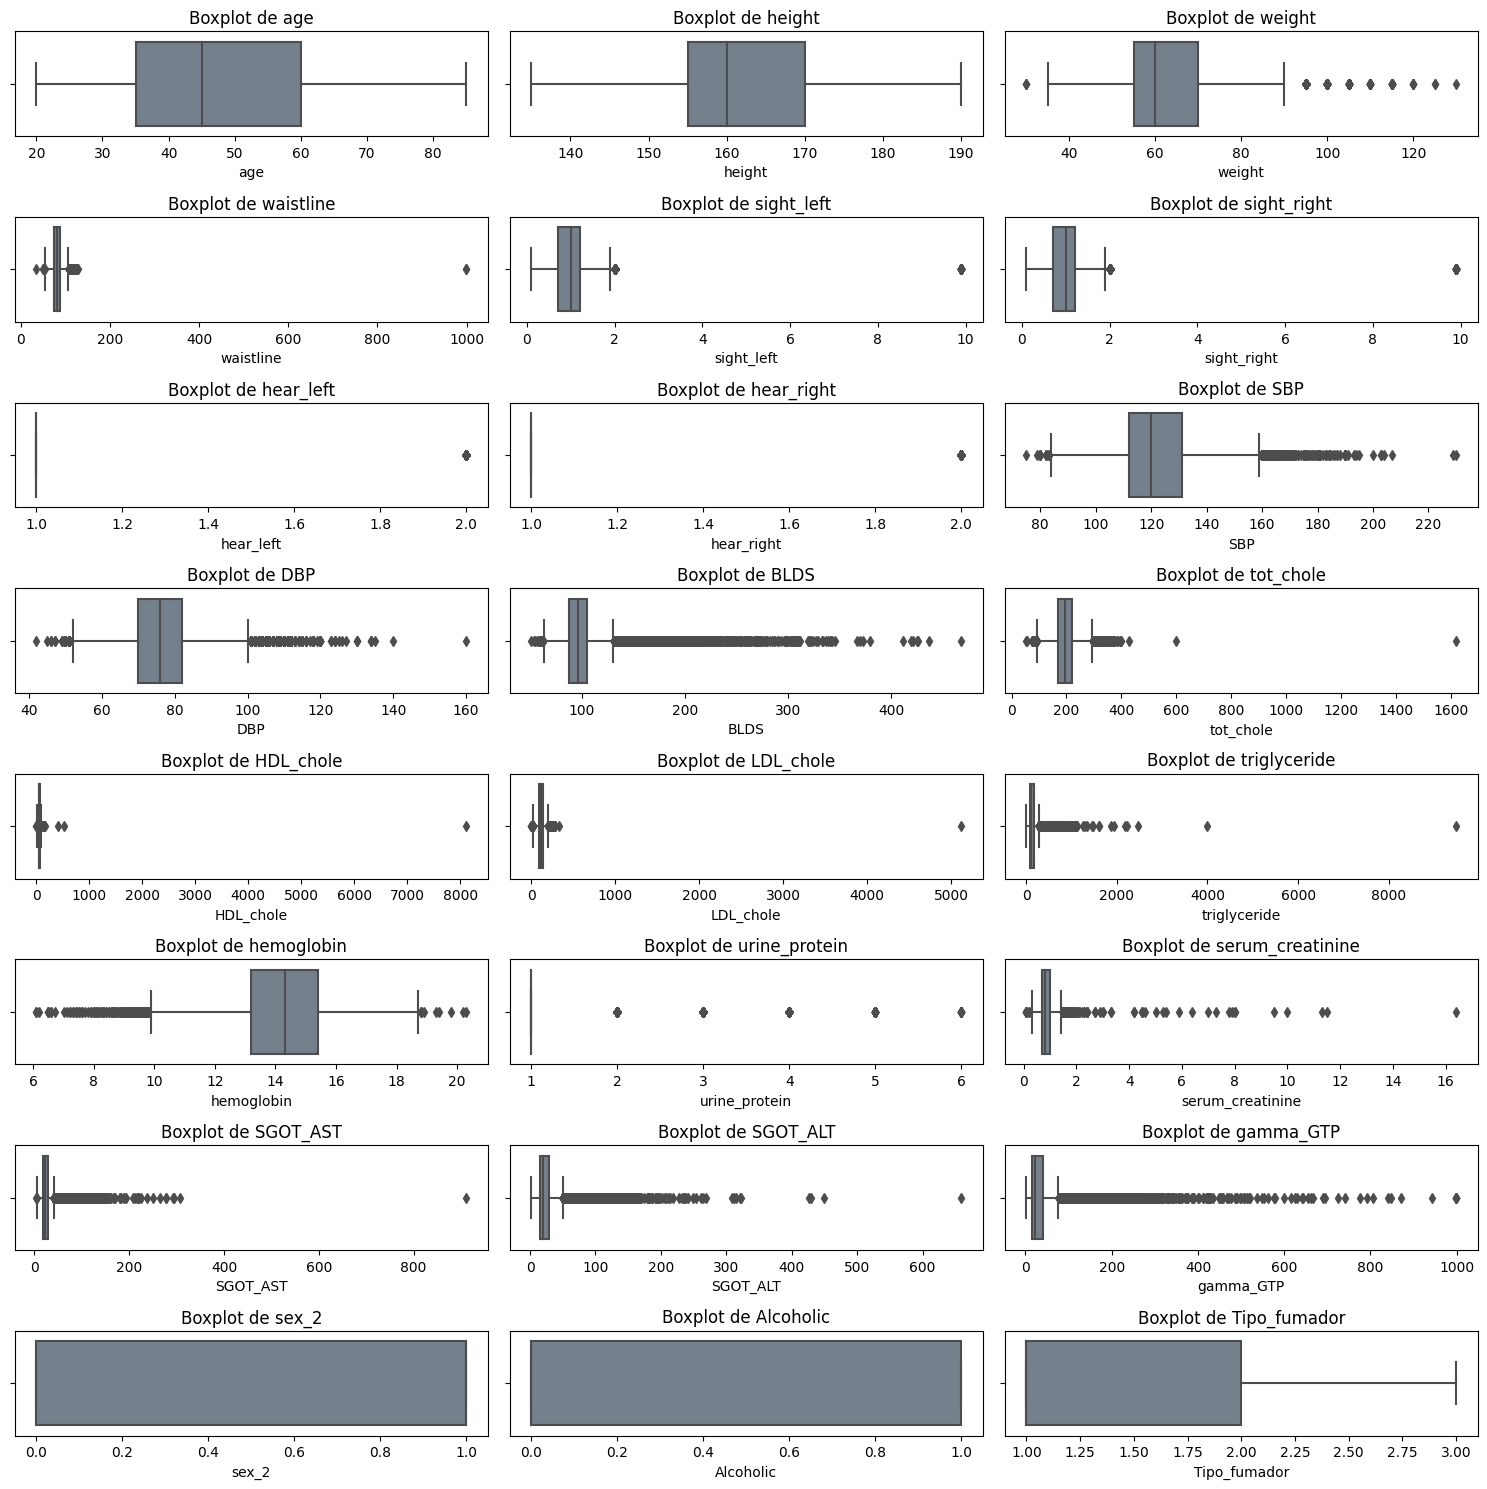

In [17]:
plot_boxplots(data_copy)


In [18]:
def remove_outliers(dataframe, columnas, k=1.5):
    for columna in columnas:
        q1 = dataframe[columna].quantile(0.25)
        q3 = dataframe[columna].quantile(0.75)
        iqr = q3 - q1
        dataframe[columna] = dataframe[columna].clip(lower=q1 - k * iqr, upper=q3 + k * iqr)

    return dataframe

In [19]:
remove_outliers(data_copy,['waistline','SBP', 'DBP','BLDS','LDL_chole','hemoglobin','tot_chole','triglyceride','serum_creatinine','SGOT_AST', 'SGOT_ALT'],k=1.5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,sex_2,Alcoholic,Tipo_fumador,outlier
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1,1,1.0,Inlier
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,15.8,1.0,0.9,20.0,36.0,27.0,1,0,3.0,Inlier
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,15.8,1.0,0.9,41.5,32.0,68.0,1,0,1.0,Inlier
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,17.6,1.0,1.1,29.0,34.0,18.0,1,0,1.0,Inlier
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,142.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1,0,1.0,Inlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24993,Female,55,155,55,70.0,0.5,0.5,1.0,1.0,132.0,...,14.0,1.0,1.0,13.0,14.0,30.0,0,0,1.0,Inlier
24994,Male,25,175,70,73.0,1.5,1.5,1.0,1.0,140.0,...,14.9,1.0,0.7,22.0,10.0,15.0,1,1,2.0,Inlier
24995,Female,50,150,65,88.0,1.0,0.7,1.0,1.0,114.0,...,14.2,1.0,0.9,17.0,15.0,33.0,0,0,1.0,Inlier
24996,Female,55,150,40,64.0,1.2,0.9,1.0,1.0,132.0,...,14.1,1.0,0.7,41.5,50.0,14.0,0,0,1.0,Inlier


## Nueva clasificación

Creamos una nueva columna que contenga a que rango de edad pertenece el usuario.

In [20]:
data_copy['age'].unique()

array([35, 30, 40, 50, 45, 55, 65, 25, 60, 20, 70, 75, 80, 85])

In [21]:
def condition(x):
    if x>= 20 and x< 30:
        return "20 - 30"
    elif x>=30 and x<40:
        return "30 - 40 "
    elif x>=40 and x<50:
        return "40 - 50 "
    elif x>=50 and x<60:
        return "50 - 60 "
    elif x>=60 and x<70:
        return "60 - 70 "
    elif x>=70 and x<80:
        return "70 - 80 "
    elif x>=80 and x<90:
        return "80 - 90 "
    else:
        return '90 - +90'

In [22]:
data_copy['Rangos'] = data_copy['age'].apply(condition)
data_copy

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,sex_2,Alcoholic,Tipo_fumador,outlier,Rangos
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,1.0,1.0,21.0,35.0,40.0,1,1,1.0,Inlier,30 - 40
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,1.0,0.9,20.0,36.0,27.0,1,0,3.0,Inlier,30 - 40
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,1.0,0.9,41.5,32.0,68.0,1,0,1.0,Inlier,40 - 50
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,1.0,1.1,29.0,34.0,18.0,1,0,1.0,Inlier,50 - 60
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,142.0,...,1.0,0.8,19.0,12.0,25.0,1,0,1.0,Inlier,50 - 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24993,Female,55,155,55,70.0,0.5,0.5,1.0,1.0,132.0,...,1.0,1.0,13.0,14.0,30.0,0,0,1.0,Inlier,50 - 60
24994,Male,25,175,70,73.0,1.5,1.5,1.0,1.0,140.0,...,1.0,0.7,22.0,10.0,15.0,1,1,2.0,Inlier,20 - 30
24995,Female,50,150,65,88.0,1.0,0.7,1.0,1.0,114.0,...,1.0,0.9,17.0,15.0,33.0,0,0,1.0,Inlier,50 - 60
24996,Female,55,150,40,64.0,1.2,0.9,1.0,1.0,132.0,...,1.0,0.7,41.5,50.0,14.0,0,0,1.0,Inlier,50 - 60


In [23]:
data_copy['Rangos'].unique()

array(['30 - 40 ', '40 - 50 ', '50 - 60 ', '60 - 70 ', '20 - 30',
       '70 - 80 ', '80 - 90 '], dtype=object)

#Representación gráfica de principales columnas a evaluar

Text(0.5, 1.0, 'Distribución de edades')

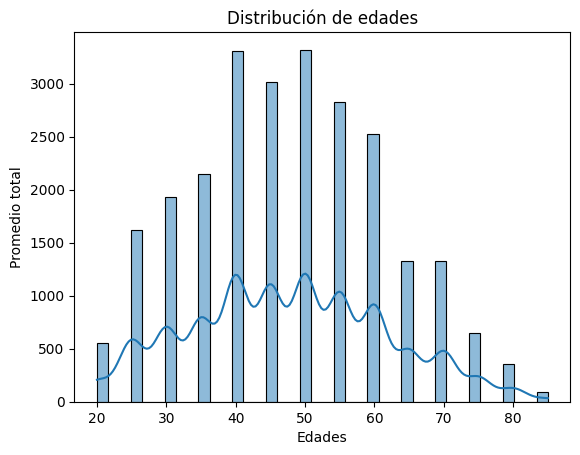

In [24]:
sns.histplot(data= data_copy, x='age', bins=40, kde='true')
plt.xlabel('Edades')
plt.ylabel('Promedio total')
plt.title('Distribución de edades')

Distribución según el peso y el sexo del individuo.

En nuestro dataset, vemos que la mayoría de los individuos tienen edades dentro del rango de "40 - 60" años

## Hemoglobina

Text(0.5, 1.0, 'Comparación de hemoglobina según tipo de fumador')

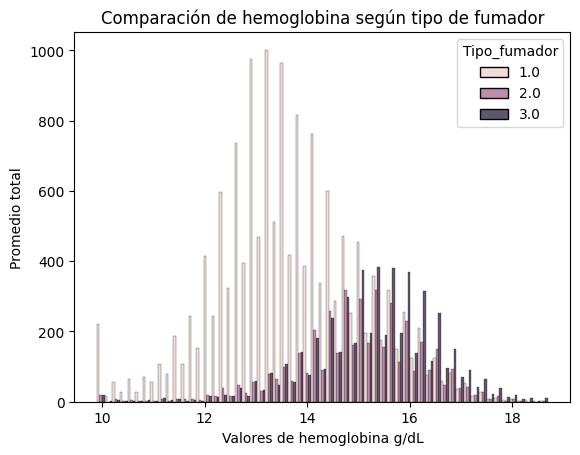

In [25]:
sns.histplot(data=data_copy, x="hemoglobin", hue="Tipo_fumador", multiple="dodge")
plt.xlabel('Valores de hemoglobina g/dL')
plt.ylabel('Promedio total')
plt.title('Comparación de hemoglobina según tipo de fumador')

Contabilizamos los niveles de hemoglobina en personas:

1.   No fuman
2.   Fuman ocasionalmente
3.   Fumadores activos

Los niveles de hemoglobina se presentan en valores mayores en personas que son fumadores activos -se incremente a partir de los 14 g/dl-
Mientras que personas que no fuman o lo hacen de manera ocasional ubican estos valores de hb en un rango de 12 a 14 g/dl





---





---



## Influencia de la edad en niveles de grasas saturadas

In [26]:
data_age_chole = data_copy.groupby(['age']).mean()

<ipython-input-26-1077317213d2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_age_chole = data_copy.groupby(['age']).mean()


In [27]:
data_age_1 = data_age_chole[['HDL_chole', 'LDL_chole', 'tot_chole', 'triglyceride']].copy()
data_age_1

,HDL_chole,LDL_chole,tot_chole,triglyceride
age,,,,
20,77.376812,95.284420,175.436594,85.385870
25,60.903206,101.776202,182.893958,100.291615
30,58.974664,110.150982,192.354705,113.943123
35,56.589767,113.576279,197.073023,130.506512
40,57.017226,114.193110,197.498036,127.082804
45,57.173307,116.659031,200.647742,130.438579
50,57.504670,119.762278,204.068093,130.555589
55,55.986563,116.383663,199.266620,131.052334
60,55.637011,114.172400,196.329379,128.508106


Text(0.5, 1.0, 'Comparativa valores de grasas')

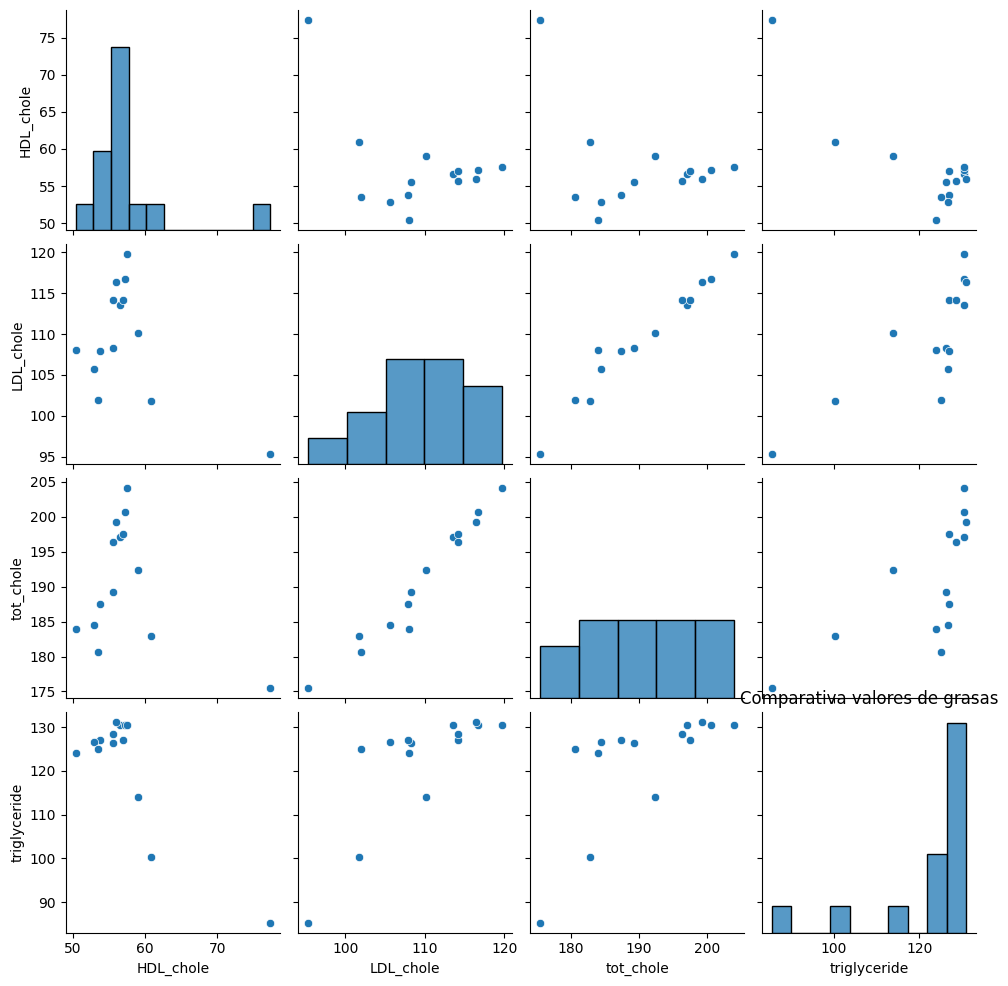

In [28]:
sns.pairplot(data_age_1)
plt.title('Comparativa valores de grasas')


## Hemoglobina fumadores y no fumadores

Text(0.5, 1.0, 'Comparativa de niveles de hemoglobina segun tipo y genero')

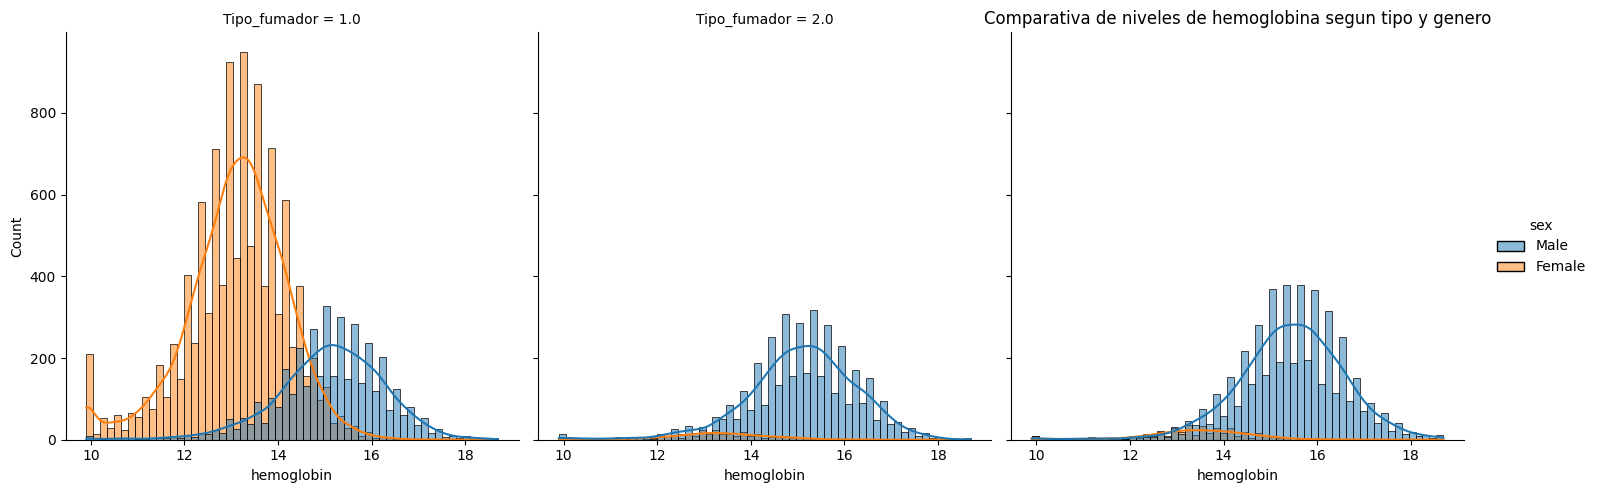

In [29]:
#¿Fuma? Niveles de hemoglobina
sns.displot(data=data_copy, x="hemoglobin", col="Tipo_fumador",kde=True, hue='sex')
plt.title('Comparativa de niveles de hemoglobina segun tipo y genero')



---





---



En este gráfico, podemos ver como se diferencian los niveles de hemoglobina en individuos que no fuman(0), que lo hacen de manera esporádica(1) y de individuos que si fuman(2).


Vemos como el genero masculino es predominante en la clasificación de fumadores esporádicos o fumadores habituales. En comparación a las mujeres que se encuentran en mayor cantidad como usuarias que no fuman.

Los niveles de hemoglobina se asocian positivamente con el tabaquismo, y a su vez, los valores aumentan dependiendo la cantidad de cigarrillos que se consumen por día

## Enzimas hepáticas y alcoholismo

Las transaminasas son un conjunto de enzimas que se encuentran dentro de celulas de distintos organos.
Catalizan (es decir, estimulan una reacción) en distintos procesos celulares.

Las concentraciones de las transaminasas son parametros que se utilizan como indicio del funcionamiento de distintos organos.

Las transaminasas a evaluar seran:

*   Transaminasa **ALT/GPT**
*   Transaminasa **AST/GOT**

**Transaminasa AST/GOT**

En varios tejidos, principalmente en el higado. Su valor elevado puede deberse a causas como infarto de miocardio, lesión hepática, entre otros.
Parametros normales:

*   8 a 33 unidades por litro (U/L)



In [30]:
data_copy['sgot_ast'] =data_copy['SGOT_AST'].apply(lambda x: 'Elevados' if x >= 33 else 'Normales')


Text(0.5, 1.0, 'Proporciones de valores de SGOT-AST según género')

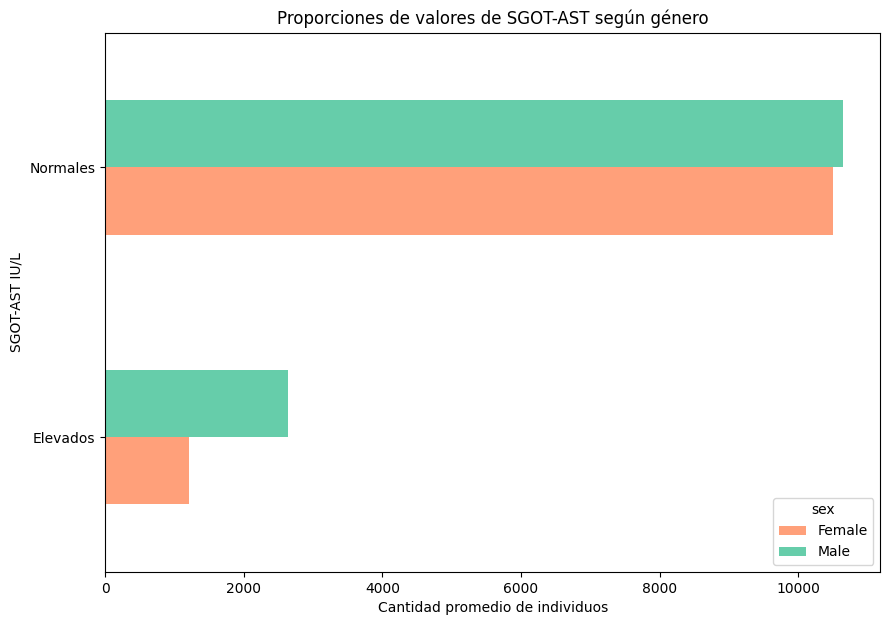

In [31]:
pivot_ast = data_copy.pivot_table(values='age', index='sgot_ast', columns=['sex'], aggfunc='count').plot.barh(figsize=(10,7), color=["lightsalmon", "mediumaquamarine"])
pivot_ast
plt.xlabel('Cantidad promedio de individuos')
plt.ylabel('SGOT-AST IU/L')
plt.title('Proporciones de valores de SGOT-AST según género')



---



**Transaminasa ALT/GPT**

En celulas del higado, su concentración elevada puede indicar daño hepático.
Parametros normales:

* 4 a 36 unidades por litro (U/L)



In [32]:
data_copy['sgot_alt'] =data_copy['SGOT_ALT'].apply(lambda x: 'Elevados' if x >= 36 else 'Normales')


Text(0.5, 1.0, 'Proporciones de valores de SGOT-ALT según género')

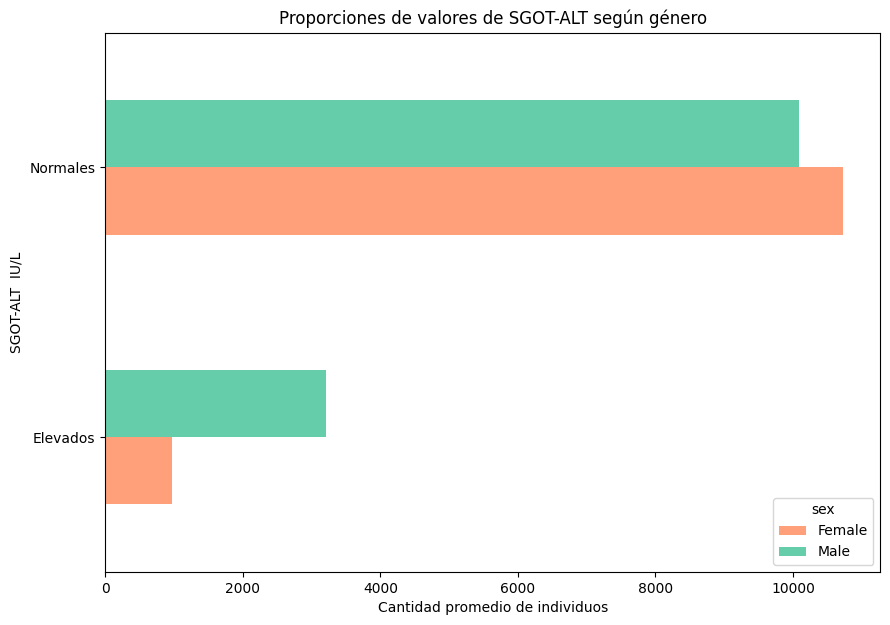

In [33]:
pivot_alt = data_copy.pivot_table(values='age', index='sgot_alt', columns=['sex'], aggfunc='count').plot.barh(figsize=(10,7), color=["lightsalmon", "mediumaquamarine"])
plt.xlabel('Cantidad promedio de individuos')
plt.ylabel('SGOT-ALT  IU/L')
plt.title('Proporciones de valores de SGOT-ALT según género')



---





---



**Gamma GGT**

Principalmente en el higado, sus valores elevados pueden indicar daño hepatico o vias biliares.
Parametros normales:

*   Rango normal: 6 a 28 unidades/litro (U/L)

In [34]:
data_copy['gamma_gtp'] = data_copy['gamma_GTP'].apply(lambda x:'Elevados' if x>=30 else 'Normales')

Text(0.5, 1.0, 'Proporciones de valores de Gamma-GTP según género')

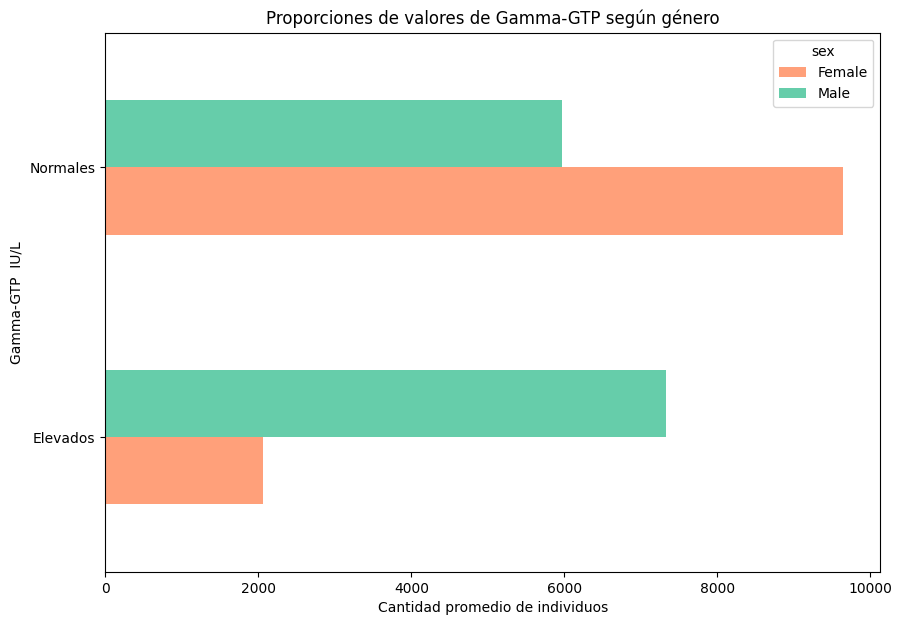

In [35]:
pivot_gamma = data_copy.pivot_table(values='age', index='gamma_gtp', columns=['sex'], aggfunc='count').plot.barh(figsize=(10,7), color=["lightsalmon", "mediumaquamarine"])
plt.xlabel('Cantidad promedio de individuos')
plt.ylabel('Gamma-GTP  IU/L')
plt.title('Proporciones de valores de Gamma-GTP según género')



---



---



In [36]:
pivot_ej = data_copy.pivot_table(values='age', index='Alcoholic', columns=['sgot_alt', 'sgot_ast', 'gamma_gtp'], aggfunc='count')
pivot_ej

sgot_alt  Elevados                            Normales                    \
sgot_ast  Elevados          Normales          Elevados          Normales   
gamma_gtp Elevados Normales Elevados Normales Elevados Normales Elevados   
Alcoholic                                                                  
0              761      348      425      232      204      395     1704   
1             1340      127      802      150      451      217     3697   

sgot_alt            
sgot_ast            
gamma_gtp Normales  
Alcoholic           
0             8452  
1             5693

Recordemos que...

Codificamos numericamente la columna 'Alcoholic', por lo que:

0.   **NO** es alcoholico
1.   **SI** es alcoholico



Es así como vemos que los individuos que presentan valores elevados de SGOT_ALT, SGOT_AST, y GAMMA_GTP son personas que actualmente podrían ser alcoholicas, demostrando así la relación que existe entre estas 3 enzimas hepáticas con el abuso de alcohol.

## Presión sistólica y diastólica - Fumador si/no

Creación de dataset alternativo que contiene variables relacionadas a la edad, signos cardíacos y si es o no la persona actual fumador

In [37]:
data_fum = data_copy[['age','SBP', 'DBP', 'Tipo_fumador']]
data_fum

,age,SBP,DBP,Tipo_fumador
0,35,120.0,80.0,1.0
1,30,130.0,82.0,3.0
2,40,120.0,70.0,1.0
3,50,145.0,87.0,1.0
4,50,142.0,82.0,1.0
...,...,...,...,...
24993,55,132.0,91.0,1.0
24994,25,140.0,71.0,2.0
24995,50,114.0,100.0,1.0
24996,55,132.0,65.0,1.0


Text(0.5, 1.0, '')

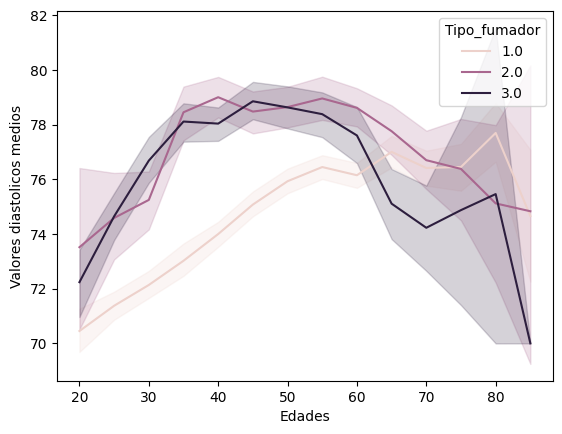

In [38]:
#Diastolica, edad y si fuma
sns.lineplot(x=data_fum["age"], y=data_fum["DBP"],
             hue="Tipo_fumador",
             data=data_fum)
plt.xlabel('Edades')
plt.ylabel('Valores diastolicos medios')
plt.title('')

En este grafico, vemos que las personas que tienen un consumo diario de tabaco (linea violeta oscura/3) presentan valores diastolicos inferiores en comparación a los otros consumidores.

## Azucar - Alcohol

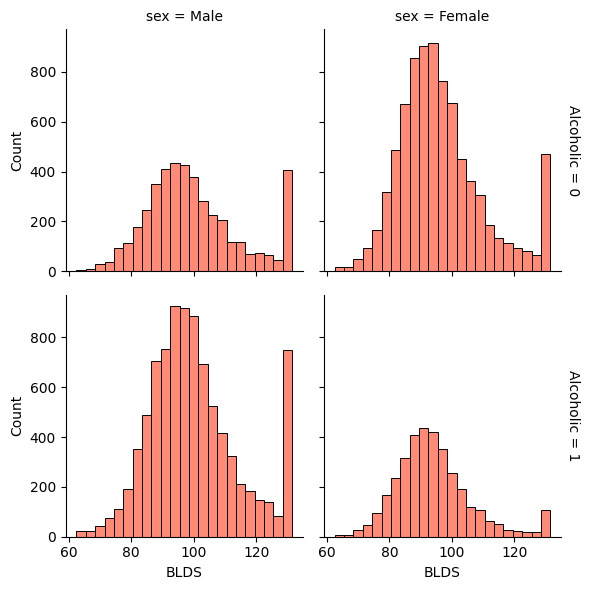

In [39]:
#fasting blood glucose, sexo y alcohol
sns.displot(
    data_copy, x="BLDS", col="sex", row="Alcoholic",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True), color="tomato"
)

Aquí, vemos como en el sexo femenino, los niveles de azucar son mayores en mujeres que no beben alcohol de manera habitual, mientras que en el sexo masculino los niveles de azucar son elevados en individuos que consumen alcohol de manera diaria.

##Información según colesterol

Nuevo dataset alternativo que concentra variables en relación a valores de colesterol

In [40]:
data_col = data_copy[['age','height','weight','tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'BLDS']].copy()

In [41]:
data = data_col.rolling(7).mean()


In [42]:
data_col_weight = data_col.groupby('weight').mean()

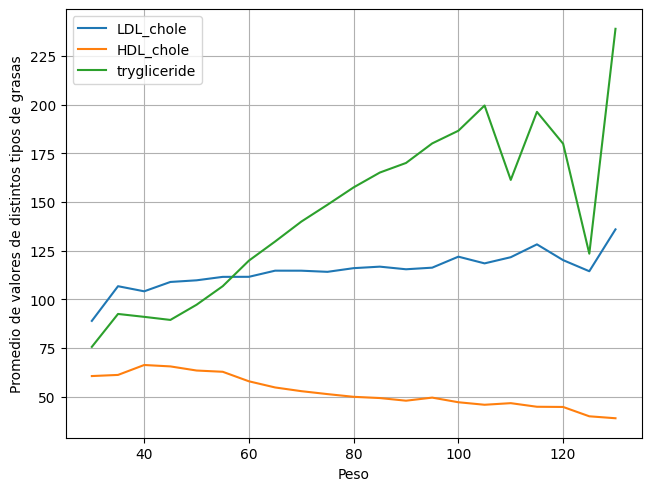

In [43]:
fig, axs = plt.subplots(1, 1, layout='constrained')
plt.plot(data_col_weight.index, data_col_weight['LDL_chole'], data_col_weight.index, data_col_weight['HDL_chole'],data_col_weight.index, data_col_weight['triglyceride'])
plt.grid(True)
labels = ['LDL_chole', 'HDL_chole', 'trygliceride']
plt.xlabel('Peso')
plt.ylabel('Promedio de valores de distintos tipos de grasas')
plt.legend(labels = labels)



Los valores de trigliceridos incrementan sus valores en relación al peso, en coincidencia con los valores de colesterol LDL.
En contraste, podemos ver que los niveles de HDL presentan una relación inversa al peso que presente el individuo

## Cantidad de personas segun edad y sexo que actualmente son fumadores

In [44]:
pivot_ej = data_copy.pivot_table(values='age', index='Tipo_fumador', columns=['sex'], aggfunc='count')

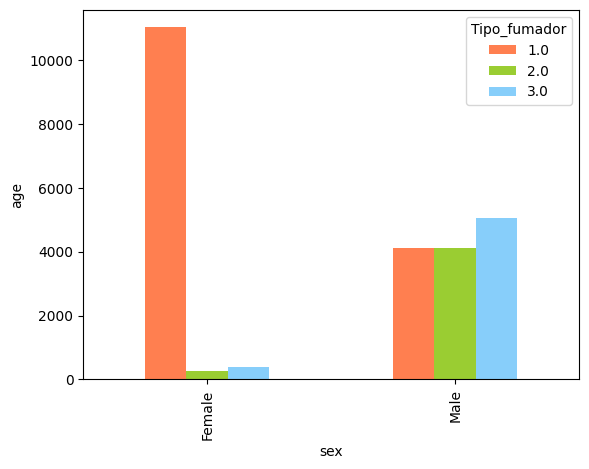

In [45]:
ax = pivot_ej.T.plot(kind='bar', ylabel='age', color =['coral', 'yellowgreen', 'lightskyblue'])

# **Predicción con *regresión lineal***


Text(0.5, 1.0, 'LDL - Colesterol total')

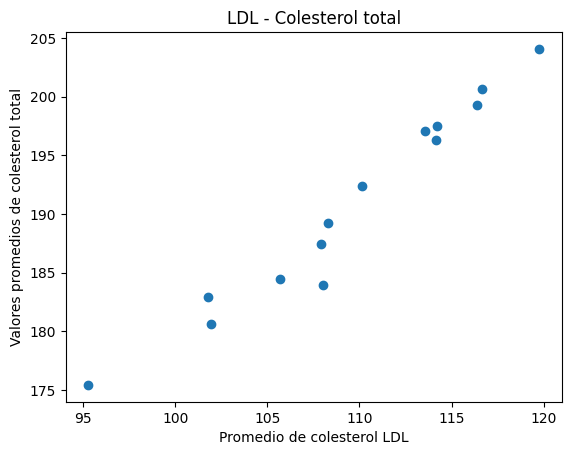

In [46]:
plt.scatter(data_age_chole['LDL_chole'].values, data_age_chole['tot_chole'].values)
plt.ylabel('Valores promedios de colesterol total')
plt.xlabel('Promedio de colesterol LDL')
plt.title('LDL - Colesterol total')

Podemos ver como los niveles de colesterol LDL aumentan en proporción a los niveles colesterol total.



---



Entrenamos un modelo de regresión lineal para estas dos variables

In [47]:
X_1 = data_age_chole['LDL_chole']
y_1 = data_age_chole['tot_chole']

In [48]:
X_1= X_1.values.reshape((-1,1))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = lr.predict(X_test)
y_pred

array([188.9766402 , 185.54118182, 171.8656257 ])

In [52]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
age,,,,
65,189.254327,188.976640,0.277686,0.146727
75,184.444099,185.541182,-1.097082,-0.594805
20,175.436594,171.865626,3.570969,2.035475


In [53]:
print(f'Interceptor: {round(lr.intercept_, 2)}')

Interceptor: 46.72


In [54]:
print(f' Coeficiente: {lr.coef_}')

 Coeficiente: [1.31334283]


In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.857394661372978

In [56]:
r2Test = round(r2_score(y_test, y_pred)*100,2)
print(f'El porcentaje de relación en las dos variables evaluadas es de:{r2Test}')

El porcentaje de relación en las dos variables evaluadas es de:85.74


# **Uso de distintos modelos de machine learning con parte del dataset**

In [57]:
data_alcoholic = data_copy[['Alcoholic', 'SGOT_ALT', 'SGOT_AST','gamma_GTP']].copy()

In [58]:
data_alcoholic

,Alcoholic,SGOT_ALT,SGOT_AST,gamma_GTP
0,1,35.0,21.0,40.0
1,0,36.0,20.0,27.0
2,0,32.0,41.5,68.0
3,0,34.0,29.0,18.0
4,0,12.0,19.0,25.0
...,...,...,...,...
24993,0,14.0,13.0,30.0
24994,1,10.0,22.0,15.0
24995,0,15.0,17.0,33.0
24996,0,50.0,41.5,14.0


In [59]:
X = data_alcoholic.drop(['Alcoholic'], axis =1)
y = data_alcoholic['Alcoholic']

Asignamos variables para el 'train' y 'test'

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Evaluación de primer modelo

In [61]:
m1=KNeighborsClassifier(3)
m1.fit(X_train,y_train)
ypred1=m1.predict(X_test)
print('KNN - 3 - Exactitud: ', round(accuracy_score(y_test,ypred1)*100, 3))

KNN - 3 - Exactitud:  57.539


In [62]:
cross_val_score(m1,X_train,y_train,cv=3).mean()

0.5672318945056353

Evaluamos el segundo modelo, cambiamos el parametro a "5"

In [63]:
m2=KNeighborsClassifier(5)
m2.fit(X_train,y_train)
ypred2=m2.predict(X_test)
print('KNN - 5- Exactitud: ', round(accuracy_score(y_test,ypred2)*100, 3))

KNN - 5- Exactitud:  58.752


In [64]:
cross_val_score(m2,X_train,y_train,cv=3).mean()

0.5795315640913037

Podemos ver, que el mejor modelo de predicción es el utilizado con parametro de indice= 5

### PCA

In [65]:
X_t = data_copy.drop(['sex', 'Alcoholic', 'outlier', 'Tipo_fumador','Rangos','sgot_ast', 'sgot_alt', 'gamma_gtp'], axis=1)
y_t = data_copy['Tipo_fumador'].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.33, random_state=42)

Escalamos los datos de nuestros datos en "**X_train**" y "**X_test**"

In [67]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Al buscar una predicción con un dataframe de distintos tipos de datos, decidimos reducir todas estas dimensiones aplicando "**PCA**"

In [68]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [69]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.21159612, 0.10061215, 0.08621615, 0.07024705, 0.06064533,
       0.05131181, 0.04647779, 0.04488524, 0.04378995, 0.0407722 ,
       0.03737575, 0.03662468, 0.03061252, 0.02818638, 0.026849  ,
       0.02293226, 0.01976211, 0.01659003, 0.00908937, 0.0079262 ,
       0.00439053, 0.00310738])

In [70]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [71]:
# Creamos el modelo
randomf = RandomForestClassifier(max_depth=6, random_state=0)
randomf.fit(X_train, y_train)

# Predicción
y_pred = randomf.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', round(accuracy*100,3))

El accuracy del modelo es: 63.782


### SVM

In [73]:
svc = SVC(C=0.1,kernel='rbf',random_state=42)
svc.fit(X_train, y_train)

SVC(C=0.1, random_state=42)

In [74]:
y_test_pred = svc.predict(X_test)

In [75]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Porcentaje de aciertos: ',round(test_accuracy*100,3))

Porcentaje de aciertos:  63.891


Decidimos en base a la exactitud, que el modelo SVM de aprendizaje automático es el mejor para este caso.